In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/Admin/Downloads/PYTHON/PYTHON FINAL/SAO KE/'
df = pd.read_csv(path + '7-14.csv')
#df.head() # default = 5
df

,Date/Doc no,Credit,Transactions in detail
0,07/09/2024_5218.59825,10000,091564.070924.070437.Ung Ho Nha Nuoc Viet Nam ...
1,07/09/2024_5215.97533,6000,358624.070924.082306.Trang Thai Luu chuyen tie...
2,07/09/2024_5220.39055,6000,412029.070924.084053.LY VAN DINH chuyen tien t...
3,07/09/2024_9915.10293,0,THU PHI DICH VU SMS CHU DONG THANG 08/2024. SD...
4,07/09/2024_5245.35951,50000,MBVCB.6967290716.NGUYEN PHU TRONG ung ho bao y...
...,...,...,...
1380490,14/09/2024,1.000.000,"""914297.140924.142612.NGUYEN VAN THANH Chuyen ..."
1380491,14/09/2024,500,"""114878.140924.142620.Nguyen Thi Nhan ung ho d..."
1380492,14/09/2024,500,"""020097040509141426212024KB2Z053047.16598.1426..."
1380493,14/09/2024,200,"""MBVCB.7032263602.ung ho moi ng vung lu.CT tu ..."


In [3]:
frames = []
#all_length = []
for file in os.listdir(path): #Đường dẫn và liệt kê các thông tin có trong đó
    if file.endswith('.csv'):
        filepath = path + file
        #filepaths.append(filepath) them dường dẫn vào DS
        df1 = pd.read_csv(filepath)
        #length_1month = len(df1.index)
        #all_length.append(length_1month)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df.to_csv('7-14.csv' ,index=False)
df.head()

,Date/Doc no,Credit,Transactions in detail
0,07/09/2024_5218.59825,10000,091564.070924.070437.Ung Ho Nha Nuoc Viet Nam ...
1,07/09/2024_5215.97533,6000,358624.070924.082306.Trang Thai Luu chuyen tie...
2,07/09/2024_5220.39055,6000,412029.070924.084053.LY VAN DINH chuyen tien t...
3,07/09/2024_9915.10293,0,THU PHI DICH VU SMS CHU DONG THANG 08/2024. SD...
4,07/09/2024_5245.35951,50000,MBVCB.6967290716.NGUYEN PHU TRONG ung ho bao y...


In [17]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380495 entries, 0 to 1380494
Data columns (total 5 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   Date/Doc no             1380495 non-null  object  
 1   Day                     1380495 non-null  object  
 2   Credit                  1351869 non-null  float64 
 3   Transactions in detail  1380495 non-null  object  
 4   Transaction Size        1351869 non-null  category
dtypes: category(1), float64(1), object(3)
memory usage: 43.4+ MB


In [19]:
total_transactions = df['Credit'].count()
print(f'Tổng số tiền giao dịch: {total_transactions}')


Tổng số tiền giao dịch: 1351869


In [20]:
df['Credit'] = df['Credit'].str.replace('.', '', regex=False)  # Loại bỏ dấu chấm
df['Credit'] = pd.to_numeric(df['Credit'], errors='coerce')  # Chuyển thành dạng số

# Tính tổng số tiền các giao dịch
total_amount = df['Credit'].sum()

print(f'Tổng số tiền của tất cả các giao dịch: {total_amount}')

AttributeError: Can only use .str accessor with string values!

In [22]:
print(df['Credit'].dtype)

float64


In [8]:
df['Day'] = df['Date/Doc no'].str[0:2] #str_slice(0,2) (star=1,stop=2)....
df.head()

,Date/Doc no,Credit,Transactions in detail,Day
0,07/09/2024_5218.59825,10000.0,091564.070924.070437.Ung Ho Nha Nuoc Viet Nam ...,07
1,07/09/2024_5215.97533,6000.0,358624.070924.082306.Trang Thai Luu chuyen tie...,07
2,07/09/2024_5220.39055,6000.0,412029.070924.084053.LY VAN DINH chuyen tien t...,07
3,07/09/2024_9915.10293,0.0,THU PHI DICH VU SMS CHU DONG THANG 08/2024. SD...,07
4,07/09/2024_5245.35951,50000.0,MBVCB.6967290716.NGUYEN PHU TRONG ung ho bao y...,07


In [23]:
print(set(df['Day']))

{'12', '07', '08', '10', '09', '14', '13', '11'}


In [10]:
## Chuyển cột 
move_column = df.pop('Day')
df.insert(1,'Day',move_column)
df.head()

,Date/Doc no,Day,Credit,Transactions in detail
0,07/09/2024_5218.59825,07,10000.0,091564.070924.070437.Ung Ho Nha Nuoc Viet Nam ...
1,07/09/2024_5215.97533,07,6000.0,358624.070924.082306.Trang Thai Luu chuyen tie...
2,07/09/2024_5220.39055,07,6000.0,412029.070924.084053.LY VAN DINH chuyen tien t...
3,07/09/2024_9915.10293,07,0.0,THU PHI DICH VU SMS CHU DONG THANG 08/2024. SD...
4,07/09/2024_5245.35951,07,50000.0,MBVCB.6967290716.NGUYEN PHU TRONG ung ho bao y...


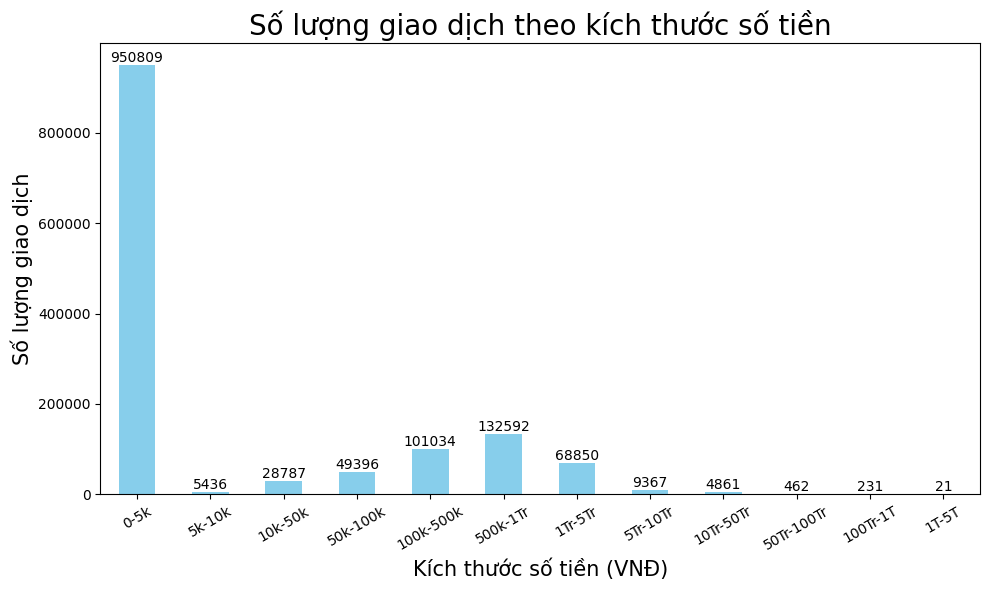

In [48]:
# Tạo các bins theo khoảng tiền
bins = [0, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 1000000000, 15000000000]
df['Transaction Size'] = pd.cut(df['Credit'], bins=bins)

# Đếm số lượng giao dịch trong mỗi khoảng kích thước
transaction_counts = df['Transaction Size'].value_counts().sort_index()

# Tạo nhãn cho các khoảng tiền theo định dạng 0-5k, 5k-10k, ...
bin_labels = ['0-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1Tr', '1Tr-5Tr', '5Tr-10Tr', '10Tr-50Tr', '50Tr-100Tr', '100Tr-1T','1T-5T']

# Vẽ biểu đồ cột
plt.figure(figsize=(10,6))
transaction_counts.plot(kind='bar', color='skyblue')

# Đặt nhãn cho trục x bằng cách gán các bin_labels
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=30)
for i, value in enumerate(transaction_counts):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
# Thiết lập trục x và trục y
plt.xlabel('Kích thước số tiền (VNĐ)', fontsize=15)
plt.ylabel('Số lượng giao dịch',fontsize=15)
plt.title('Số lượng giao dịch theo kích thước số tiền',fontsize=20)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [12]:
max_credit_index = df['Credit'].idxmax()

# Lấy thông tin của người có số Credit nhiều nhất
max_credit_person = df.iloc[max_credit_index]

# In ra thông tin
print("Người có số Credit nhiều nhất:")
print(max_credit_person)

Người có số Credit nhiều nhất:
Date/Doc no                                                      13/09/2024
Day                                                                      13
Credit                                                        10460780225.0
Transactions in detail    "SHGD 10002657.DD 240913.BO CONG TY CO PHAN CH...
Transaction Size                                  (1000000000, 15000000000]
Name: 811642, dtype: object


In [13]:
nan_count = df['Credit'].isnull().sum()

print(f"Số lượng giá trị NaN trong cột Credit: {nan_count}")

Số lượng giá trị NaN trong cột Credit: 28626


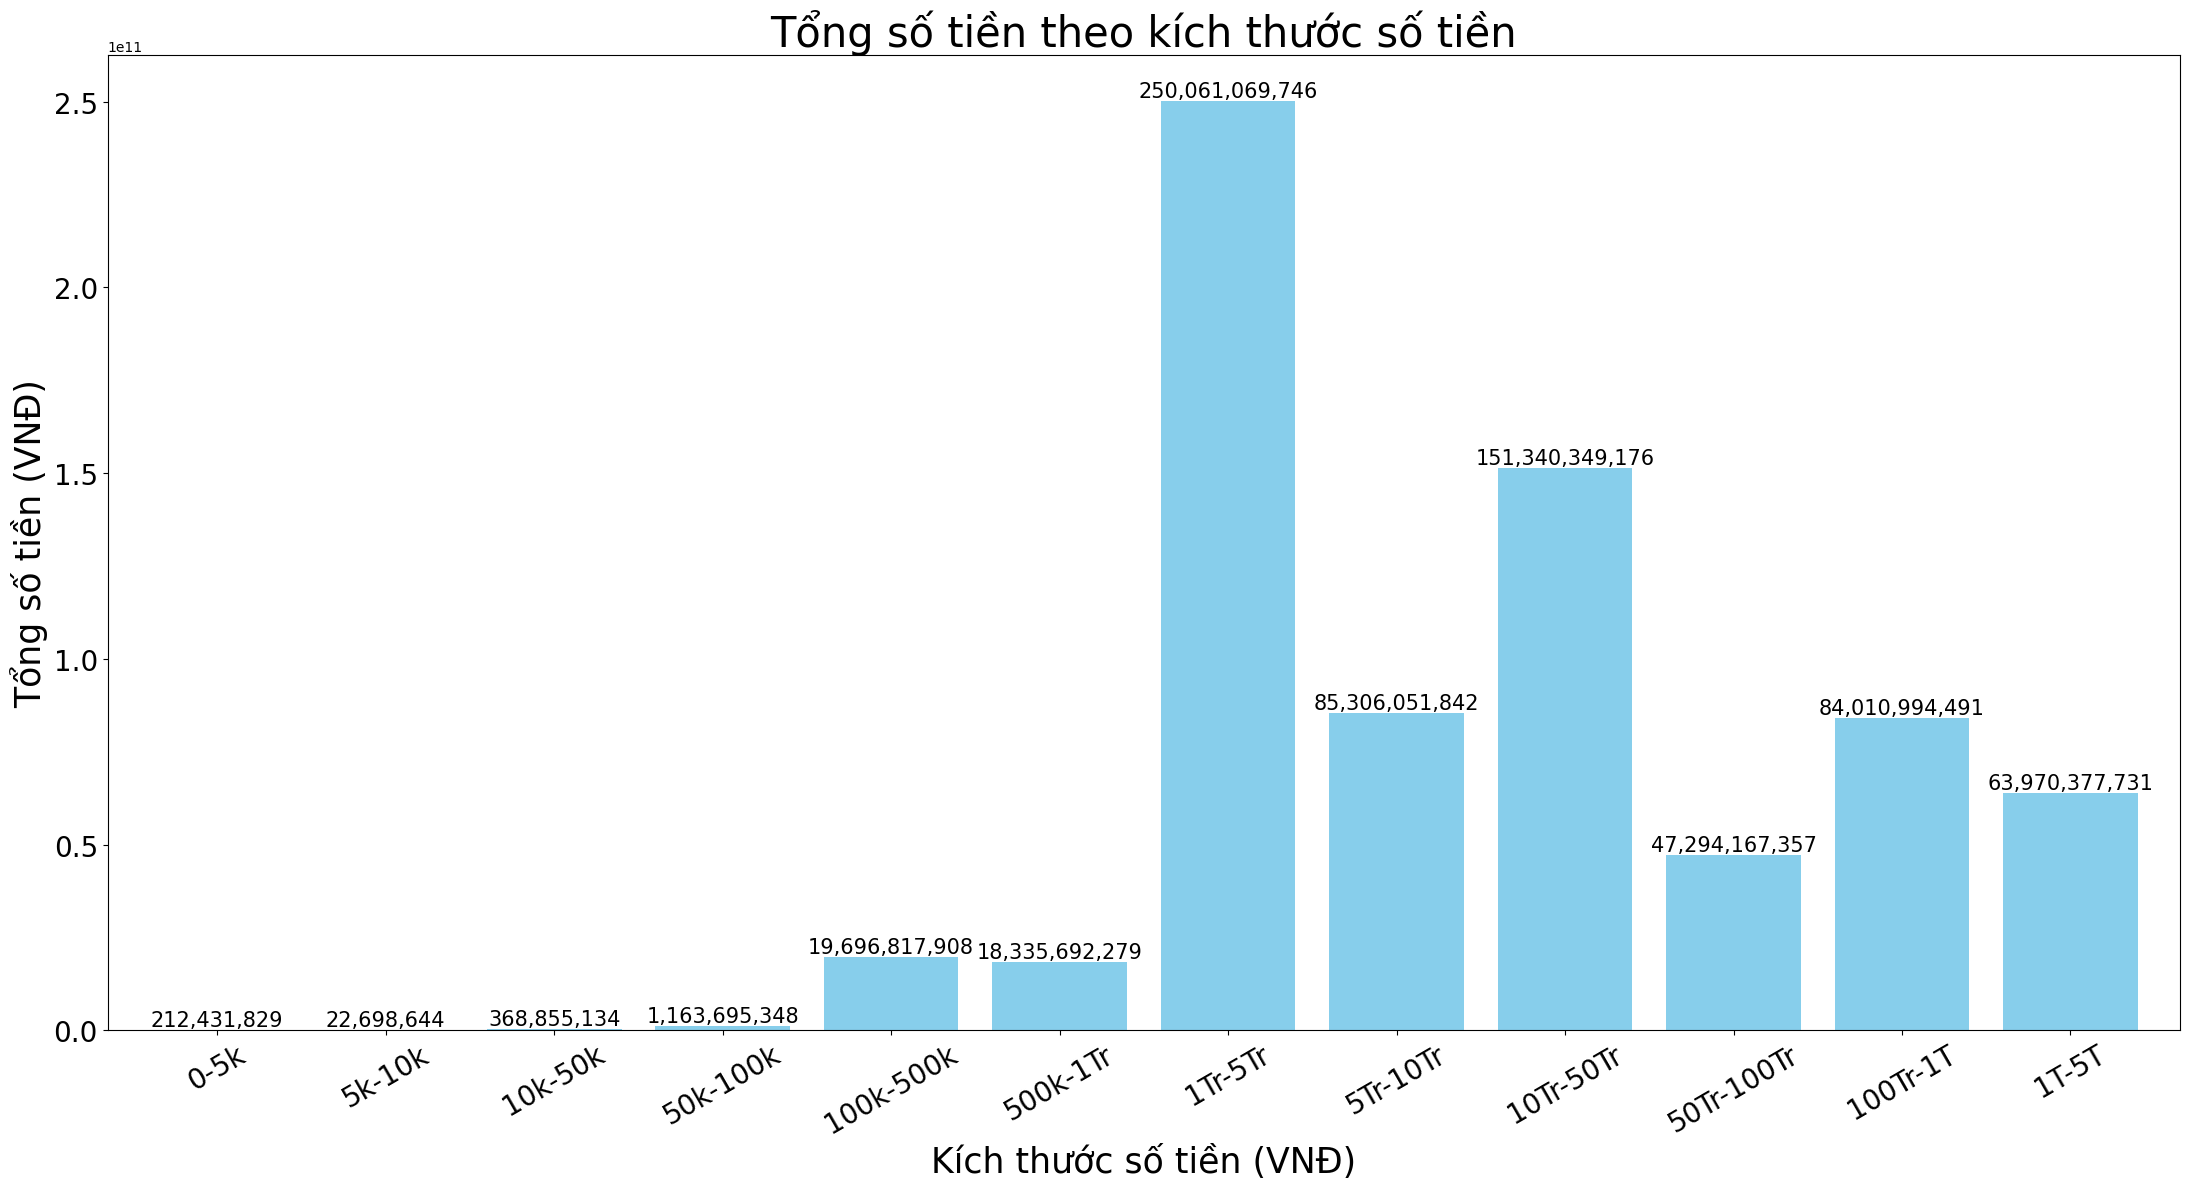

In [62]:
bins = [0, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 1000000000, 15000000000]
labels = ['0-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1Tr', '1Tr-5Tr', '5Tr-10Tr', '10Tr-50Tr', '50Tr-100Tr', '100Tr-1T','1T-5T']

# Phân loại các giá trị Credit vào các khoảng
df['Transaction Size'] = pd.cut(df['Credit'], bins=bins, labels=labels, right=False)

# Tính tổng số tiền cho mỗi khoảng, thêm observed=False
total_amount = df.groupby('Transaction Size', observed=False)['Credit'].sum()

# Vẽ biểu đồ cột
plt.figure(figsize=(22, 12))  # Tăng kích thước hình ảnh
total_amount.plot(kind='bar', color='skyblue', width=0.8)  # Điều chỉnh độ rộng cột

# Thiết lập trục x và trục y
plt.xlabel('Kích thước số tiền (VNĐ)',fontsize=25)
plt.ylabel('Tổng số tiền (VNĐ)',fontsize=25)
plt.title('Tổng số tiền theo kích thước số tiền',fontsize=30)

# Hiển thị số tổng tiền ngay trên các cột, nâng cao vị trí
for index, value in enumerate(total_amount):
    plt.text(index, value + 8, f'{value:,.0f}', ha='center', va='bottom',fontsize=15)  # Nâng nhãn lên trên cột

# Đặt độ nghiêng cho nhãn trục x
plt.xticks(rotation=30,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()  # Tự động điều chỉnh khoảng cách
plt.show()


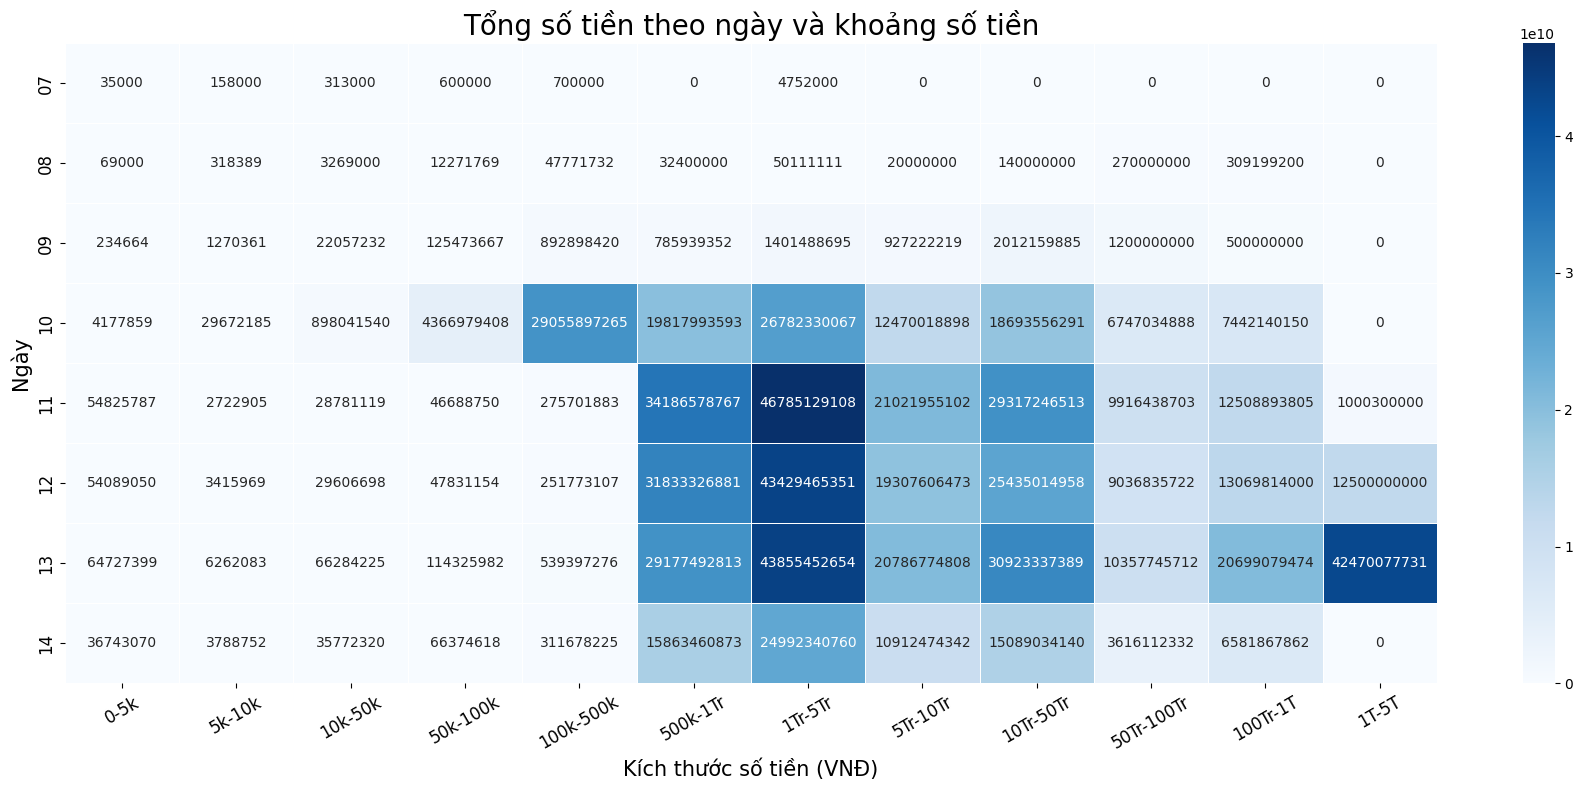

In [65]:
# Tạo các bins theo khoảng tiền
bins = [0, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 1000000000, 15000000000]
df['Transaction Size'] = pd.cut(df['Credit'], bins=bins)

# Tạo nhãn cho các khoảng tiền
bin_labels = ['0-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1Tr', '1Tr-5Tr', '5Tr-10Tr', '10Tr-50Tr', '50Tr-100Tr', '100Tr-1T','1T-5T']

# Đổi tên các bins bằng nhãn
df['Transaction Size Label'] = pd.cut(df['Credit'], bins=bins, labels=bin_labels)

# Nhóm dữ liệu theo ngày và khoảng số tiền, rồi tính tổng số tiền trong mỗi nhóm
heatmap_data = df.groupby(['Day', 'Transaction Size Label'], observed=False)['Credit'].sum().unstack().fillna(0)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5)

# Thiết lập trục x và trục y
plt.xlabel('Kích thước số tiền (VNĐ)', fontsize=15)
plt.ylabel('Ngày', fontsize=15)
plt.title('Tổng số tiền theo ngày và khoảng số tiền',fontsize=20)

# Hiển thị biểu đồ
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()